## Настройки и импорты

In [ ]:
# Базовые библиотеки и модули
import os                       # Работа с операционной системой
import numpy as np              # Работа с массивами
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt # Визуализация графиков
import warnings                 # Управление предупреждениями
from tqdm.notebook import tqdm  # Прогресс-бар для ноутбуков
import glob                     # Работа с путями файлов
import cv2                      # Работа с видео

# Keras
import tensorflow as tf       # Импорт TensorFlow
from tensorflow import keras  # Импорт Keras


# Функции для загрузки и преобразования изображений
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.models import Sequential, Model   # Модели
from tensorflow.keras import layers                     # Слои для моделей
from tensorflow.keras.optimizers import Adam            # Оптимизатор Adam
from tensorflow.keras.losses import BinaryCrossentropy  # Функция потерь Binary Cross Entropy
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input


# Отключение вывода предупреждений
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

# Подключение Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Вывод списка доступных устройств
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


## Загрузка данных

Датасет взять с https://www.kaggle.com/datasets/soumikrakshit/anime-faces

In [ ]:
!cp /content/drive/MyDrive/Презентации/archive.zip /content/arhive.zip

In [ ]:
!unzip /content/arhive.zip

In [ ]:
# Установка базового каталога с изображениями
BASE_DIR = '/content/data/'

In [ ]:
# Получение всех путей к изображениям с расширением .png в каталоге
image_paths = glob.glob(BASE_DIR+'*.png')
print(image_paths[:3]) # Вывод первых трех путей к изображениям
print("Count images:", len(image_paths)) # Вывод количества изображений

In [ ]:
# Функция для отображения изображений в сетке
def display_images_grid(image_paths, grid_size=7):
    plt.figure(figsize=(15, 15))
    temp_images = image_paths[:grid_size * grid_size] # Ограничение количества изображений
    for index, image_path in enumerate(temp_images, start=1):
        plt.subplot(grid_size, grid_size, index) # Создание подграфика
        img = np.array(load_img(image_path)) # Загрузка изображения
        plt.imshow(img) # Отображение изображения
        plt.axis('off') # Отключение осей

In [ ]:
display_images_grid(image_paths) # Вызов функции для отображения изображений

# Аугментация - Albumentations

In [ ]:
import albumentations as A

In [ ]:
# Функция для отображения изображений в сетке
def display_images_grid(image_paths, grid_size=7):
    plt.figure(figsize=(15, 15))
    temp_images = image_paths[:grid_size * grid_size] # Ограничение количества изображений
    for index, image_path in enumerate(temp_images, start=1):
        plt.subplot(grid_size, grid_size, index) # Создание подграфика
        img = np.array(load_img(image_path)) # Загрузка изображения
        plt.imshow(img) # Отображение изображения
        plt.axis('off') # Отключение осей

display_images_grid(image_paths) # Вызов функции для отображения изображений

In [ ]:
def augment_image(image_path):
    # Загружаем изображение
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Создаем конвейер аугментаций
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),   # вероятность отражения по горизонтали
        A.RandomBrightnessContrast(p=0.3),  # случайно меняем яркость и контраст
        A.HueSaturationValue(p=0.3),  # меняем оттенок, насыщенность и значение
        A.GaussianBlur(blur_limit=(3, 7), p=0.2),  # размытие по Гауссу
    ])

    # Применяем аугментацию
    augmented = transform(image=image)
    augmented_image = augmented['image']

    return augmented_image


In [ ]:
# Функция для отображения изображений в сетке
def display_images_grid(image_paths, grid_size=7):
    plt.figure(figsize=(15, 15))
    temp_images = image_paths[:grid_size * grid_size] # Ограничение количества изображений
    for index, image_path in enumerate(temp_images, start=1):
        plt.subplot(grid_size, grid_size, index) # Создание подграфика
        img = np.array(augment_image(image_path)) # Загрузка изображения
        plt.imshow(img) # Отображение изображения
        plt.axis('off') # Отключение осей

display_images_grid(image_paths) # Вызов функции для отображения изображений

# Аугментация - RemBg

In [ ]:
!pip install rembg

In [ ]:
from rembg import remove

def remove_background(input_path):
    image = cv2.imread(input_path)
    output = remove(image)
    return image, output

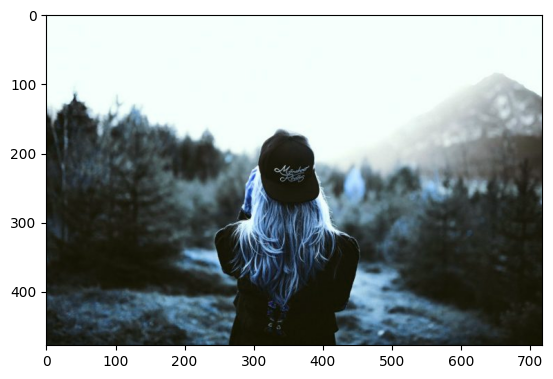

In [ ]:
input_path = '/content/img1.jpg'
image, output = remove_background(input_path)
plt.imshow(image) # Отображение изображения

In [ ]:
plt.imshow(output) # Отображение изображения

In [ ]:
input_path = '/content/img2.jpg'
image, output = remove_background(input_path)
plt.imshow(image) # Отображение изображения

In [ ]:
plt.imshow(output) # Отображение изображения

# Способы загрузки изображений

0) Чтение через cv и запись в список numpy

In [ ]:
import cv2
import numpy as np
import os

list_of_image_paths = ["path_to_image1", "path_to_image2", ...]
list_of_labels = [label1, label2, ...]

images = []
labels = []

for image_path, label in zip(list_of_image_paths, list_of_labels):
    image = cv2.imread(image_path)

    # Если нужно, конвертируем из BGR (стандарт OpenCV) в RGB (стандарт для большинства других библиотек)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Изменяем размер изображения (по необходимости)
    image = cv2.resize(image, (150, 150))

    images.append(image)
    labels.append(label)

# Преобразуем списки в numpy массивы для дальнейшего использования в TensorFlow
images_np = np.array(images)
labels_np = np.array(labels)


---

1) Загрузка изображений с помощью tf.data:

Если у вас есть список файлов изображений и соответствующих им меток, вы можете загрузить их с помощью tf.data.Dataset.

In [ ]:
# Список путей к изображениям для загрузки
list_of_image_paths = ["path_to_image1", "path_to_image2", ...]

# Список меток, соответствующих каждому изображению из list_of_image_paths
list_of_labels = [label1, label2, ...]

# Функция для загрузки и предварительной обработки изображений
def load_image(image_path, label):
    # Чтение файла изображения по указанному пути
    img = tf.io.read_file(image_path)

    # Декодирование изображения из формата JPEG и установка количества каналов равным 3 (RGB)
    img = tf.image.decode_jpeg(img, channels=3)

    # Изменение размера изображения на 150x150 пикселей
    img = tf.image.resize(img, [150, 150])

    # Возвращение предобработанного изображения и его метки
    return img, label

del list_of_image_paths

# Создание объекта Dataset из списков путей к изображениям и меток
dataset = tf.data.Dataset.from_tensor_slices((list_of_image_paths, list_of_labels))

# Применение функции load_image ко всем элементам dataset с помощью метода .map()
dataset = dataset.map(load_image)


---

2) Использование готовых датасетов из tf.keras.datasets

Здесь в качестве примера используется датасет CIFAR-10:

In [ ]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

* Преимущества: Изображения хранятся в оптимизированной форме и обычно разбиты на обучающий и тестовый наборы.
* Недостатки: Ограничен выбором доступных датасетов.

----

3) Загрузка изображений из директории с помощью tf.keras.preprocessing.image_dataset_from_directory:

Предположим, что у вас есть структура папок следующим образом:

```
dataset/
├── class1/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
├── class2/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
└── ...
```



In [ ]:
# Путь к директории датасета
dataset_path = "path_to_dataset_directory"

# Желаемый размер каждого изображения после загрузки и преобразования
image_size = (150, 150)

# Размер пакета (batch) данных при обучении
batch_size = 32

# Загрузка и преобразование изображений из указанной директории для обучающего набора данных
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,                 # Путь к директории датасета
    validation_split=0.2,        # Процент данных, выделяемый для валидационного набора
    subset="training",            # Указывает, что данный датасет будет использован для обучения
    seed=1337,                   # Зерно для рандомизации, чтобы гарантировать одинаковое разделение данных на обучение и валидацию
    image_size=image_size,       # Размер, к которому будут приведены все изображения
    batch_size=batch_size,       # Размер пакета (batch) данных

)

# Загрузка и преобразование изображений из указанной директории для валидационного набора данных
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,                 # Путь к директории датасета
    subset="validation",          # Указывает, что данный датасет будет использован для валидации
    validation_split=0.1,
    seed=1337,                   # Зерно для рандомизации, чтобы гарантировать одинаковое разделение данных на обучение и валидацию
    image_size=image_size,       # Размер, к которому будут приведены все изображения
    batch_size=batch_size,       # Размер пакета (batch) данных

)

* Преимущества: Прямая загрузка из структурированной директории; изображения могут быть автоматически масштабированы и аугментированы.
* Недостатки: Если датасет большой, это может занимать много оперативной памяти.

# Генерация текста

In [ ]:
!pip install transformers[torch]
!pip install accelerate -U

In [ ]:
import math
import os.path

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM # OpenAI
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback
import sklearn.model_selection


In [ ]:
with open('/content/extract_dialogues_from_anekdots.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
text.split('\n')[:15]

In [ ]:
class GptDialogueDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, file_path, block_size):

        # Инициализируем пустой список для хранения примеров
        self.examples = []

        # Преобразование не задано
        self.transform = None

        # Открываем файл с диалогами в режиме чтения
        with open(file_path, encoding="utf-8") as f:

            # Разбиваем текст на чанки по разделителю пустой строки
            chunks = f.read().split('\n\n')

            for chunk in chunks:

                # Пропускаем пустые чанки
                if len(chunk) > 0:

                    # Токенизируем чанк при помощи tokenizer
                    tokenized_chunk = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(chunk.strip()))

                    # Получаем длину
                    l = len(tokenized_chunk)

                    # Если длина меньше размера блока, добавляем в примеры
                    if l < block_size:
                        self.examples.append(tokenizer.build_inputs_with_special_tokens(tokenized_chunk))

                    # Иначе разбиваем на блоки нужного размера
                    else:
                        while tokenized_chunk:
                            self.examples.append(tokenizer.build_inputs_with_special_tokens(tokenized_chunk[:block_size]))
                            tokenized_chunk = tokenized_chunk[block_size:]

    def __len__(self):

        # Возвращаем количество примеров
        return len(self.examples)

    def __getitem__(self, idx):

        # Преобразуем индекс в int если нужно
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample = self.examples[idx]

        # Применяем преобразование
        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
# Выбираем устройство - GPU или CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 16
# Размер батча


In [ ]:
model_name = "sberbank-ai/rugpt3small_based_on_gpt2" # Имя модели

Токенизатор (tokenizer) - это компонент в библиотеке Transformers, который используется для преобразования текста в токены.

Токены - это цифровые идентификаторы слов и символов в тексте. Например, токенизатор может преобразовать предложение "Hello world!" в последовательность токенов [101, 7592, 999], где 101 - идентификатор токена для слова "Hello", 7592 - для "world", 999 - для знака "!".

То есть токенизатор позволяет представить текст в виде числовых векторов, удобных для обработки нейронными сетями. А токены - это элементы этих векторов.

Пример того, как в целом работает токенизация:

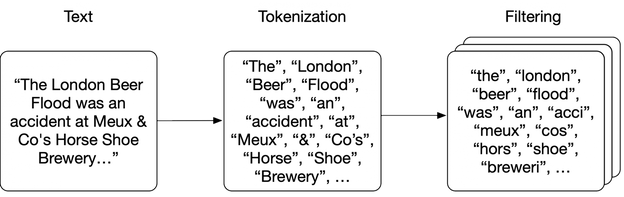

p.s. в данном коде не совсем так, у нас не удаляются предлоги и пунктуация и итоговые токены хранятся в виде чисел

In [ ]:
# Инициализируем токенизатор
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Добавляем специальные токены
tokenizer.add_special_tokens({'bos_token': '<s>', 'eos_token': '</s>', 'pad_token': '<pad>'})

# bos_token - начало предложения
# eos_token - конец предложения
# pad_token - заполнение до максимальной длины



In [ ]:
# Загружаем модель
model = AutoModelForCausalLM.from_pretrained(model_name)

# Переносим модель на выбранное устройство
model.to(device);

In [ ]:
dataset_path = 'extract_dialogues_from_anekdots.txt'

In [ ]:
# Создаем датасет
train_dataset = GptDialogueDataset(tokenizer=tokenizer,  file_path=dataset_path, block_size=128)


# Разбиваем датасет на обучение и тест
train_samples, _ = sklearn.model_selection.train_test_split(train_dataset, test_size=0.9)
train_samples, test_samples = sklearn.model_selection.train_test_split(train_samples, test_size=0.1)


In [ ]:
# Смотрим размер обучающей выборки
len(train_samples)

In [ ]:
# Пример из датасета
train_dataset[0], tokenizer.decode(train_dataset[0])

Коллатор (DataCollator) в PyTorch используется для предобработки и формирования батчей данных перед подачей их в модель в процессе тренировки или инференса.

Основные функции коллатора:

Объединение отдельных примеров данных в батчи заданного размера.
Преобразование данных в тензоры torch.Tensor для модели PyTorch.
Выравнивание размеров примеров в батче по длине - например, дополнение короче примеров паддингами до максимальной длины.
Генерация масок, определяющих позиции паддингов.
Приведение типов данных к ожидаемым моделью (int, float и т.п.).

Коллатор DataCollatorForLanguageModeling. Он выполняет выравнивание длины токенов в батче для модели Transformer, дополняя короткие примеры паддингами. Это нужно, чтобы обеспечить единый размер входа для всех примеров в батче при тренировке модели.

In [ ]:
# Инициализируем коллатор для выравнивания длины примеров
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False) #Приводилось к одинаковому размеру

In [ ]:
# Путь для сохранения модели
output_model_dir = '../models/modelb0'

In [ ]:
# Скорость обучения
learning_rate = 1e-4

In [ ]:
# Аргументы обучения
training_args = TrainingArguments(
   # Путь для сохранения обученной модели
   output_dir=output_model_dir,

   # Перезаписать существующую модель при сохранении
   overwrite_output_dir=True,

   # Скорость обучения
   learning_rate=learning_rate,

   # Количество эпох обучения
   num_train_epochs=1,

   # Размер батча для обучения
   per_device_train_batch_size=batch_size,

   # Размер батча для валидации
   per_device_eval_batch_size=batch_size,

   # Стратегия оценки модели в процессе обучения
   evaluation_strategy='steps',

   # Оценивать модель каждые eval_steps шагов
   eval_steps=100,

   # Сохранять модель каждые save_steps шагов
   save_steps=100,

   # Выводить лог каждые logging_steps шагов
   logging_steps=100,

   # Максимальное число сохраненных моделей
   save_total_limit=2,

   # Количество шагов для "разогрева" скорости обучения
   warmup_steps=100,

   # Выводить лог с первого шага обучения
   logging_first_step=True,

   # Загрузить лучшую модель в конце обучения
   load_best_model_at_end=True,

   # Не выгружать модель на Hub
   push_to_hub=False,

   # Отключить визуализацию прогресса в tqdm
   disable_tqdm=False
)

In [ ]:
# Инициализируем тренер
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_samples,
    eval_dataset=test_samples,
)


In [ ]:
train_result = trainer.train()

In [ ]:
def get_text(prompt):
    prompt += '\n- '
    encoded_prompt = tokenizer.encode(prompt, return_tensors="pt").to(device)
    out = model.generate(encoded_prompt, max_new_tokens=50, do_sample=True, top_k=100, top_p=0.5, temperature=0.8,
                     num_return_sequences=1, eos_token_id=2, pad_token_id=0, no_repeat_ngram_size=2)
    tokens = out.cpu().tolist()[0]
    text = tokenizer.decode(tokens)
    return text

In [ ]:
prompt = '- Я затрудняюсь поставить вам диагноз.'
ans = get_text(prompt)
print(ans)